# Feature Engineering

As the dataset is unbalanced, the model is good at predicting case with no virus. Features have to be tweaked to allow the model to identify that virus is present.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [2]:
df_train=pd.read_csv("./input/train.csv")

In [3]:
data = pd.read_csv('./output/data_v0.csv')
data = data.drop('Unnamed: 0',axis=1)
data.columns

Index(['Date', 'Species', 'Trap', 'Latitude', 'Longitude', 'WnvPresent',
       'source', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'PrecipTotal',
       'Month', 'Year', 'Day', 'Week'],
      dtype='object')

In [4]:
data['Month'].value_counts()

7     38271
8     36866
9     27830
6     21049
10     2699
5        84
Name: Month, dtype: int64

In [5]:
data.head(1)

,Date,Species,Trap,Latitude,Longitude,WnvPresent,source,Tmax,Tmin,Tavg,DewPoint,WetBulb,PrecipTotal,Month,Year,Day,Week
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,0.0,1,88.0,62.5,75.5,58.5,65.5,0.0,5,2007,29,22


Using a few weather features as a binary indicator to set '1' or '0' above a certain threshold.

https://towardsdatascience.com/a-go-at-kaggle-723447f8d95f

As the dataset is unbalanced, the features need to engineered to allow the model to be able to identify records with the virus present. A few features are set as binary indicators to indicate that the virus is present. For these features, average count of the virus that is present is used as the threshold.

In [6]:
len(data[(data['WnvPresent']==1)]['Trap'].value_counts())

97

In [7]:
# Using trap features, mean is calculated from all traps(97) with the virus present(551).
data[(data['WnvPresent']==1)]['Trap'].value_counts().mean()

5.680412371134021

In [8]:
def bar_mean_plot(df,col):
    num=df[(df['WnvPresent']==1)][col].value_counts()
    num.plot(kind='bar',figsize=(30,10))
    plt.hlines(num.mean(),xmin=0,xmax=len(num))

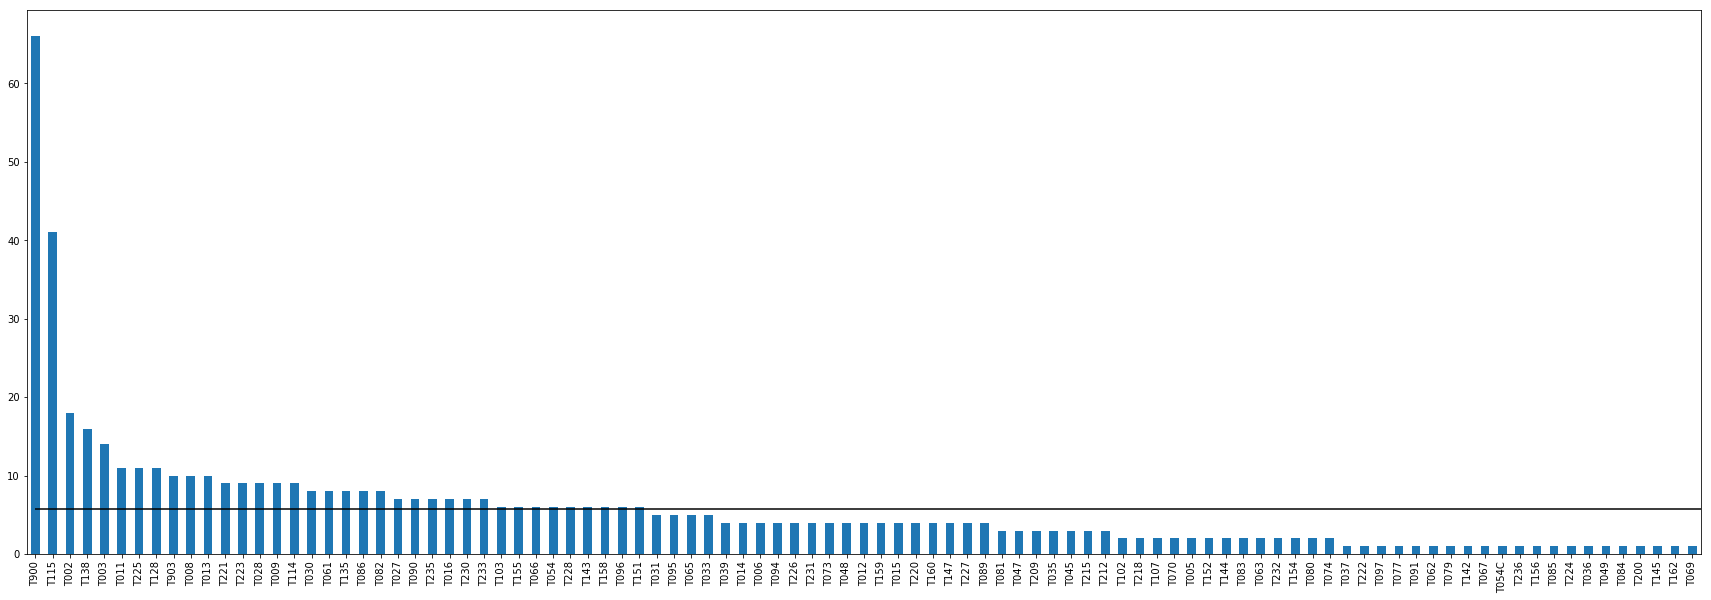

In [9]:
bar_mean_plot(data,'Trap')

In [10]:
# Function to set binary indicators using the original column and creating a new column. 
# Using mean as the threshold to set 1 or 0.
def threshold(data_df,col,new_col,t_value):
    
    df = pd.DataFrame(data[(data['WnvPresent']==1)][col].value_counts()>t_value)
    lista = df[df[col] == True].index
    print(lista)
    
    print(len(lista))
    data_df[new_col] = data_df[col].apply(lambda x:1 if x in lista else 0)
    print(data_df[new_col].value_counts())
    

In [11]:
threshold(data,'Trap','Trap_binary',5.68)

Index(['T900', 'T115', 'T002', 'T138', 'T003', 'T011', 'T225', 'T128', 'T903',
       'T008', 'T013', 'T221', 'T223', 'T028', 'T009', 'T114', 'T030', 'T061',
       'T135', 'T086', 'T082', 'T027', 'T090', 'T235', 'T016', 'T230', 'T233',
       'T103', 'T155', 'T066', 'T054', 'T228', 'T143', 'T158', 'T096', 'T151'],
      dtype='object')
36
0    92157
1    34642
Name: Trap_binary, dtype: int64


In [12]:
# Using WetBulb, mean is calculated from a range of WetBulb temperatures (31) with the virus present(551).

In [13]:
len(data[(data['WnvPresent']==1)]['WetBulb'].value_counts())

31

In [14]:
data[(data['WnvPresent']==1)]['WetBulb'].value_counts().mean()

17.774193548387096

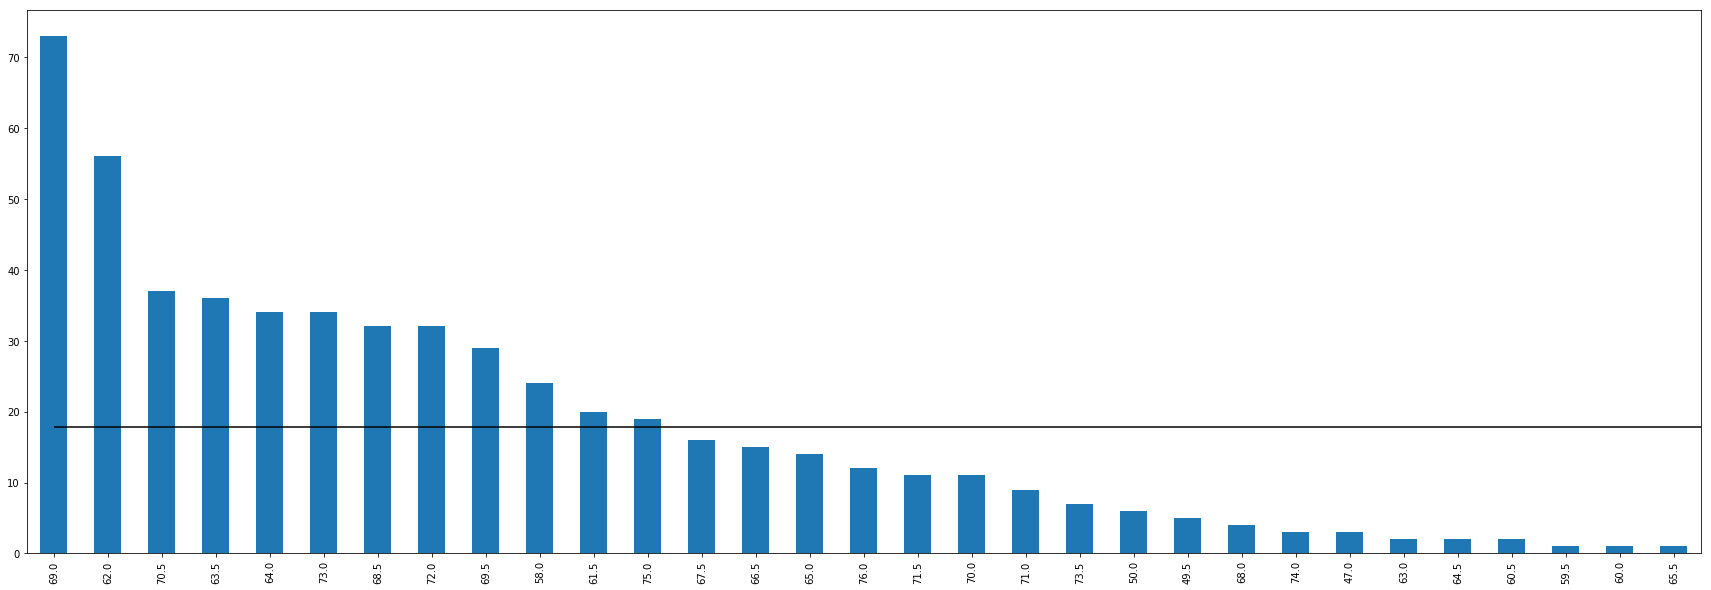

In [15]:
bar_mean_plot(data,'WetBulb')

In [16]:
threshold(data,'WetBulb','Wetbulb_binary',17.77)

Float64Index([69.0, 62.0, 70.5, 63.5, 64.0, 73.0, 68.5, 72.0, 69.5, 58.0, 61.5,
              75.0],
             dtype='float64')
12
0    91522
1    35277
Name: Wetbulb_binary, dtype: int64


In [17]:
# Using Dewpoint, mean is calculated from a range of DewPoint temperatures (35) with the virus present(551).

In [18]:
len(data[(data['WnvPresent']==1)]['DewPoint'].value_counts())

35

In [19]:
data[(data['WnvPresent']==1)]['DewPoint'].value_counts().mean()

15.742857142857142

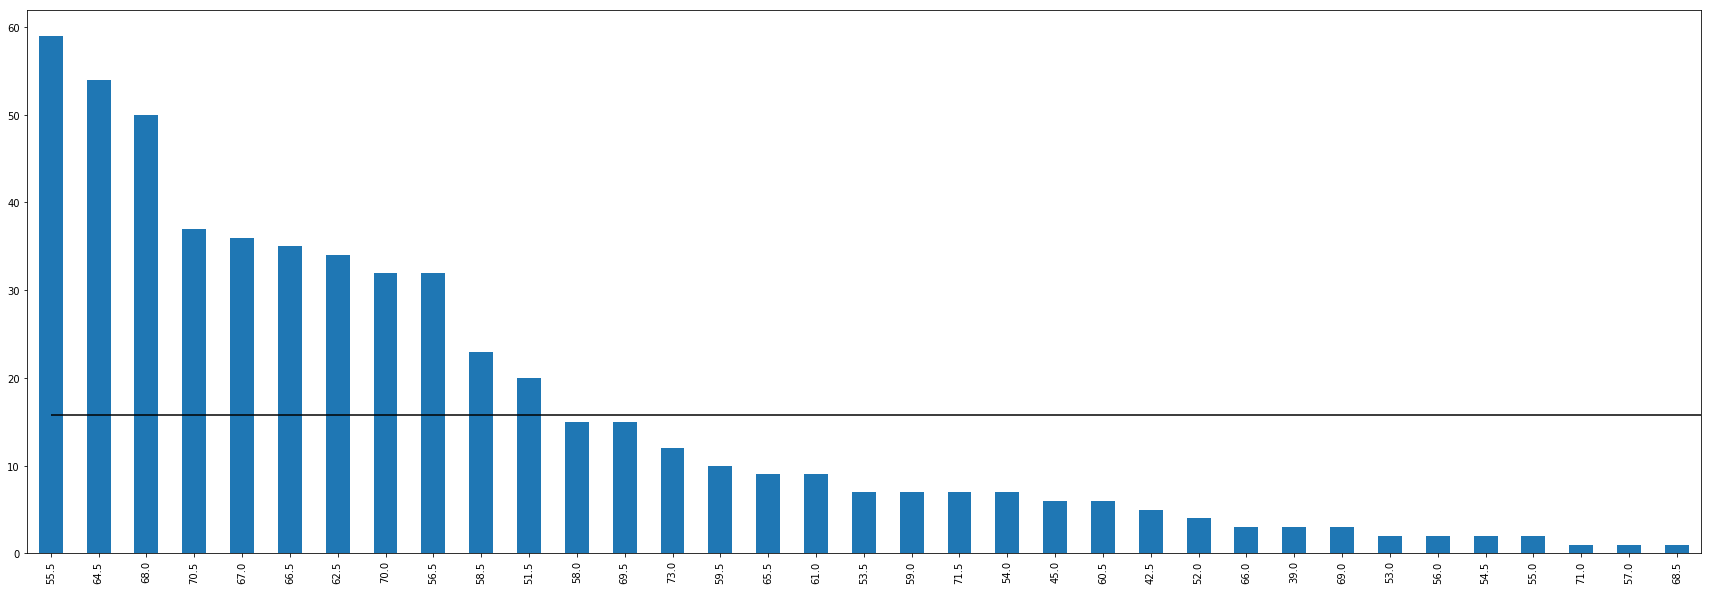

In [20]:
bar_mean_plot(data,'DewPoint')

In [21]:
threshold(data,'DewPoint','DewPoint_binary',15.74)

Float64Index([55.5, 64.5, 68.0, 70.5, 67.0, 66.5, 62.5, 70.0, 56.5, 58.5,
              51.5],
             dtype='float64')
11
0    95211
1    31588
Name: DewPoint_binary, dtype: int64


In [22]:
# Using Tavg, mean is calculated from a range of Tavg temperatures (35) with the virus present(551).

In [23]:
len(data[(data['WnvPresent']==1)]['Tavg'].value_counts())

30

In [24]:
data[(data['WnvPresent']==1)]['Tavg'].value_counts().mean()

18.366666666666667

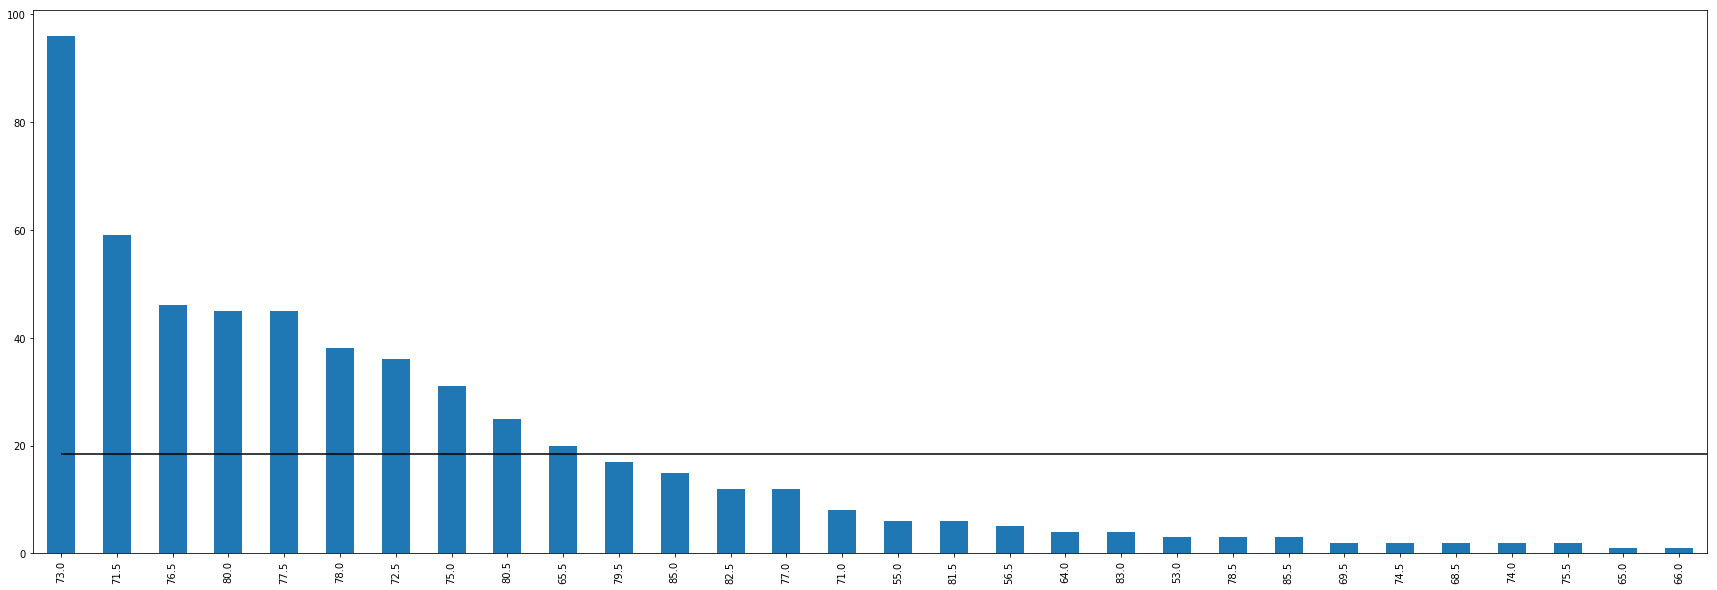

In [25]:
bar_mean_plot(data,'Tavg')

In [26]:
threshold(data,'Tavg','Tavg_binary',18.37)

Float64Index([73.0, 71.5, 76.5, 80.0, 77.5, 78.0, 72.5, 75.0, 80.5, 65.5], dtype='float64')
10
0    91637
1    35162
Name: Tavg_binary, dtype: int64


In [27]:
data.head()

,Date,Species,Trap,Latitude,Longitude,WnvPresent,source,Tmax,Tmin,Tavg,DewPoint,WetBulb,PrecipTotal,Month,Year,Day,Week,Trap_binary,Wetbulb_binary,DewPoint_binary,Tavg_binary
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,0.0,1,88.0,62.5,75.5,58.5,65.5,0.0,5,2007,29,22,1,0,1,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,0.0,1,88.0,62.5,75.5,58.5,65.5,0.0,5,2007,29,22,1,0,1,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,0.0,1,88.0,62.5,75.5,58.5,65.5,0.0,5,2007,29,22,0,0,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,0.0,1,88.0,62.5,75.5,58.5,65.5,0.0,5,2007,29,22,0,0,1,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,0.0,1,88.0,62.5,75.5,58.5,65.5,0.0,5,2007,29,22,0,0,1,0


In [28]:
# Trap was dropped to prevent the increase of features due to get dummies. 
# Wet Bulb and Tavg are dropped as the feature importance are quite low.
data.drop(['Date','Trap','WetBulb','Tavg'],axis=1,inplace=True)

In [29]:
data=pd.get_dummies(data=data)

In [30]:
data.columns

Index(['Latitude', 'Longitude', 'WnvPresent', 'source', 'Tmax', 'Tmin',
       'DewPoint', 'PrecipTotal', 'Month', 'Year', 'Day', 'Week',
       'Trap_binary', 'Wetbulb_binary', 'DewPoint_binary', 'Tavg_binary',
       'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS',
       'Species_CULEX TERRITANS', 'Species_UNSPECIFIED CULEX'],
      dtype='object')

In [31]:
data.head()

,Latitude,Longitude,WnvPresent,source,Tmax,Tmin,DewPoint,PrecipTotal,Month,Year,Day,Week,Trap_binary,Wetbulb_binary,DewPoint_binary,Tavg_binary,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX
0,41.954690,-87.800991,0.0,1,88.0,62.5,58.5,0.0,5,2007,29,22,1,0,1,0,0,0,1,0,0,0,0,0
1,41.954690,-87.800991,0.0,1,88.0,62.5,58.5,0.0,5,2007,29,22,1,0,1,0,0,0,0,1,0,0,0,0
2,41.994991,-87.769279,0.0,1,88.0,62.5,58.5,0.0,5,2007,29,22,0,0,1,0,0,0,0,1,0,0,0,0
3,41.974089,-87.824812,0.0,1,88.0,62.5,58.5,0.0,5,2007,29,22,0,0,1,0,0,0,1,0,0,0,0,0
4,41.974089,-87.824812,0.0,1,88.0,62.5,58.5,0.0,5,2007,29,22,0,0,1,0,0,0,0,1,0,0,0,0


In [32]:
data.shape

(126799, 24)

In [33]:
# This is the data used for modelling.
data.to_csv('./output/data.csv')